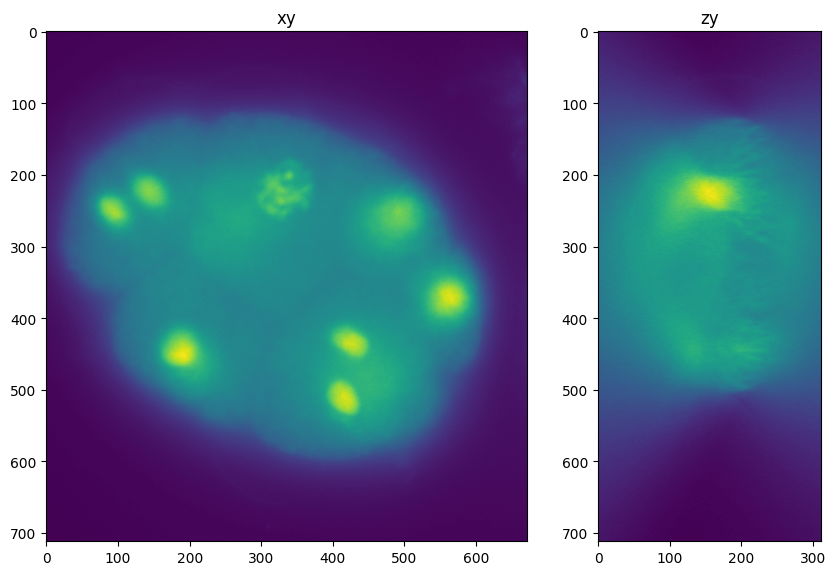

In [46]:
from skimage.io import imread
from tnia.plotting.projections import show_xy_zy_slice

path_=r"D:\images\tnia-python-images\deconvolution\c.elegans"

im = imread(path_ + r"\CElegans-DAPI.tif")

xtv=150
ytv=240
ztv=50
fig=show_xy_zy_slice(im, xtv, ytv, ztv, 1, 3, figsize=(10,10))

In [16]:
import napari
viewer = napari.Viewer()
viewer.show()
viewer.add_image(im, name='c.elegans', colormap='green', scale=(1,1,3))

<Image layer 'c.elegans' at 0x21bb4ab60a0>

sdeconv 1.x.x detected


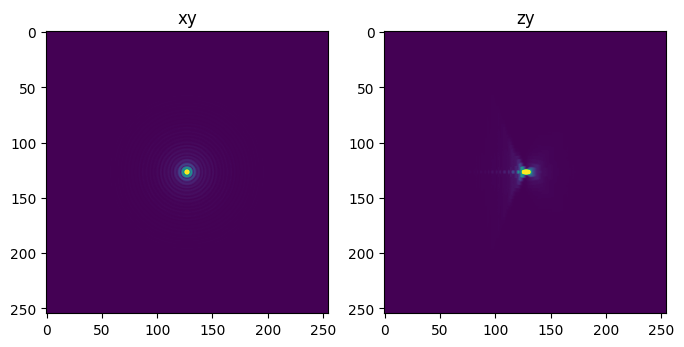

In [50]:
from tnia.nd.ndutil import centercrop
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xy_zy_max
from tnia.deconvolution.psfs import recenter_psf_axial
from skimage.io import imsave

ni=1.518
ns_to_test=[1.42,1.44,1.46,1.48,1.50,1.518]
ns=1.42
NA=1.4
w=0.477

xy_spacing = 0.0645
z_spacing=.16

ratio=z_spacing/xy_spacing

xy_psf_dim=255
z_compute_psf_dim=599
z_crop_psf_dim=101

#depth to compute PSF at
d=52*z_spacing


psf  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_compute_psf_dim, d, w)
psf = psf.astype('float32')

#fig=show_xy_zy_max(psf, vmax=psf.max())
psf=recenter_psf_axial(psf, 255)
#psf,labels=recenter_psf_axial(psf, 255, return_labels=True)
#fig=show_xy_zy_max(labels)
fig=show_xy_zy_max(psf, vmax=psf.max()/4, figsize=(8,4))

get lib


Text(0.5, 0.98, 'decon')

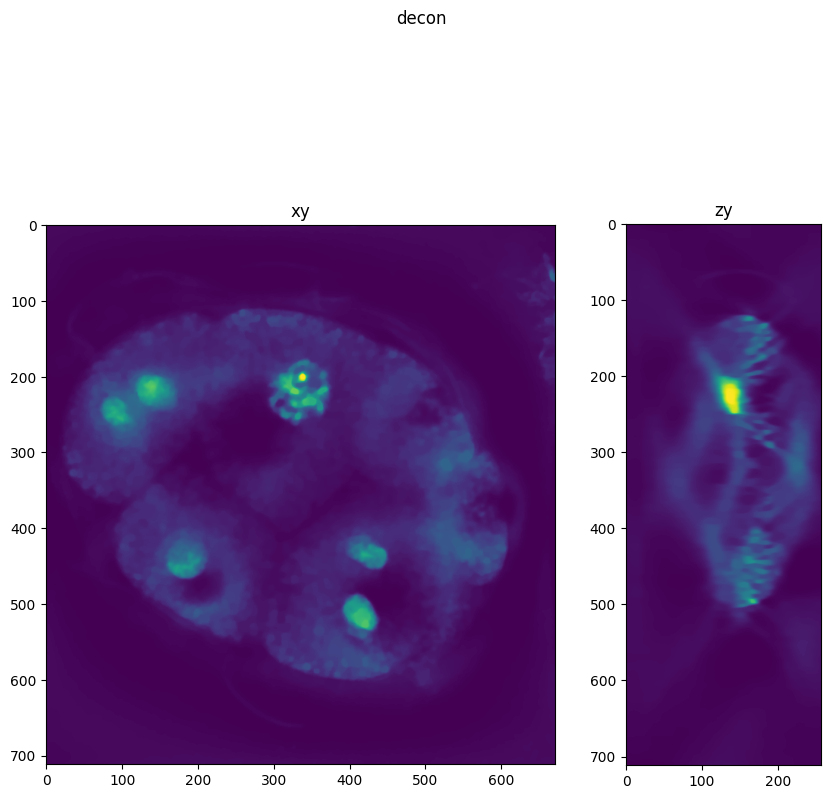

In [55]:

from clij2fft.richardson_lucy import richardson_lucy_nc
regularization_factor=0.0002

im_decon = richardson_lucy_nc(im, psf, 2000, regularization_factor)
fig=show_xy_zy_slice(im_decon,xtv, ytv, ztv, sz=ratio, figsize=(10,10))
fig.suptitle('decon')

In [56]:

save_path=r"D:\images\tnia-python-images\deconvolution\c.elegans"
from skimage.io import imsave
imsave(save_path+"\\CElegans-DAPI-decon-tv-python.tif", im_decon)

In [59]:
decon=imread(save_path+"\\CElegans-decon-python.tif")
im=imread(save_path+"\\CElegans.tif")

In [87]:
decon=decon*(2**16/decon.max())

In [91]:
import napari
viewer = napari.Viewer()
viewer.show()
#viewer.add_image(im, name='c.elegans', scale=(1,1,3), channel_axis=3)
viewer.add_image(im, name='c.elegans', scale=(3,1,1), channel_axis=3, colormap=['red','green','blue'])
viewer.add_image(decon, name='c.elegans-decon', scale=(3,1,1), channel_axis=3, colormap=['red','green','blue'])
#viewer.add_image(im_decon, name='c.elegans-decon', scale=(3,1,1))

[<Image layer 'c.elegans-decon' at 0x21c5e4c42e0>,
 <Image layer 'c.elegans-decon [1]' at 0x21c60ef9fa0>,
 <Image layer 'c.elegans-decon [2]' at 0x21c60fec520>]

Rendering frames...


100%|██████████| 46/46 [00:04<00:00,  9.65it/s]


In [89]:
decon.max()

65536.0

In [62]:
help(viewer.add_image)

Help on method add_image in module napari.components.viewer_model:

add_image(data=None, *, channel_axis=None, rgb=None, colormap=None, contrast_limits=None, gamma=1, interpolation2d='nearest', interpolation3d='linear', rendering='mip', depiction='volume', iso_threshold=0.5, attenuation=0.05, name=None, metadata=None, scale=None, translate=None, rotate=None, shear=None, affine=None, opacity=1, blending=None, visible=True, multiscale=None, cache=True, plane=None, experimental_clipping_planes=None) -> 'Union[Image, List[Image]]' method of napari.viewer.Viewer instance
    Add an image layer to the layer list.
    
    Parameters
    ----------
    data : array or list of array
        Image data. Can be N >= 2 dimensional. If the last dimension has length
        3 or 4 can be interpreted as RGB or RGBA if rgb is `True`. If a
        list and arrays are decreasing in shape then the data is treated as
        a multiscale image. Please note multiscale rendering is only
        supported i